In [3]:
import pandas as pd

df = pd.read_csv('togo-dapaong_qc.csv', parse_dates=['Timestamp'])
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [4]:
df.describe()
df.isna().sum().sort_values(ascending=False)


,0
Comments,525600
GHI,0
Timestamp,0
DNI,0
DHI,0
ModB,0
ModA,0
RH,0
WS,0
WSgust,0


In [5]:
from scipy.stats import zscore
import numpy as np

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-score method for outlier detection
z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)
df_outliers = df[outliers.any(axis=1)]
print(f"Number of outliers: {df_outliers.shape[0]}")


Number of outliers: 9251


In [6]:
df_clean = df.drop(df_outliers.index)


In [7]:
df_clean[columns_to_check] = df_clean[columns_to_check].fillna(df_clean[columns_to_check].median())

In [8]:
df_clean.to_csv('togo_clean.csv', index=False)

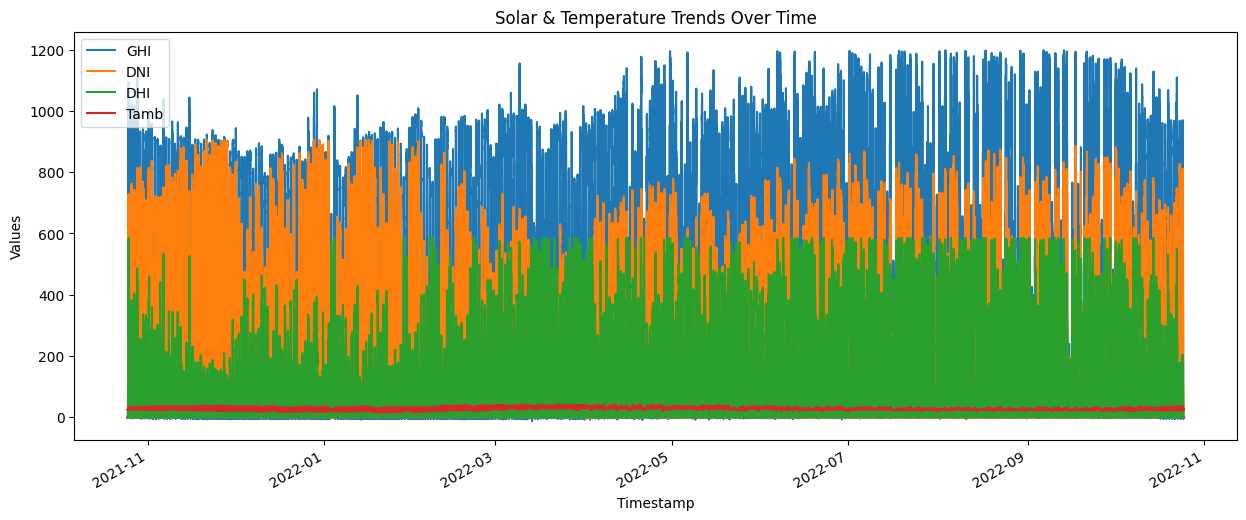

In [9]:
import matplotlib.pyplot as plt

df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,6))
plt.title("Solar & Temperature Trends Over Time")
plt.ylabel("Values")
plt.show()


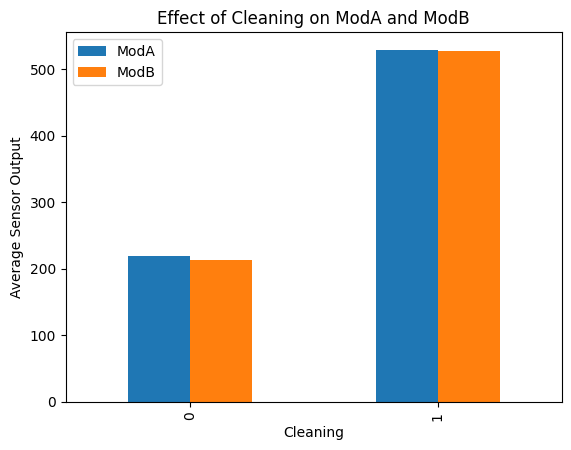

In [10]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on ModA and ModB')
plt.ylabel('Average Sensor Output')
plt.show()

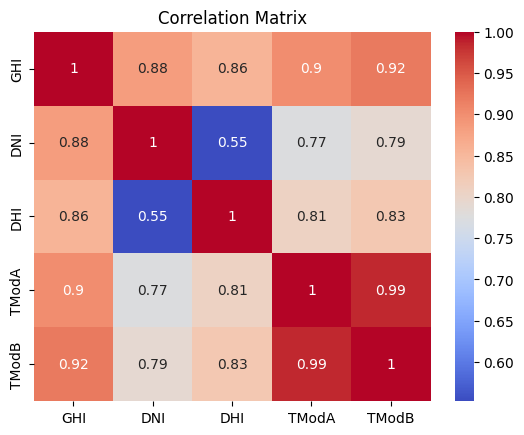

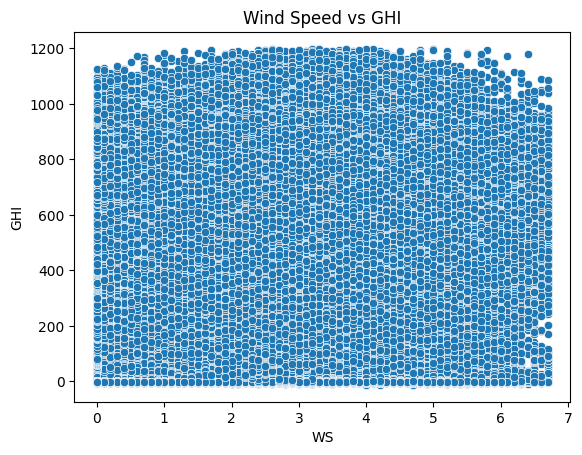

In [11]:
import seaborn as sns

sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter examples
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title('Wind Speed vs GHI')
plt.show()


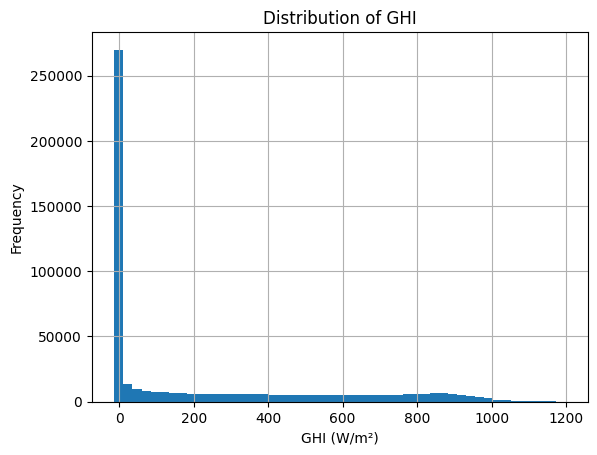

In [12]:
df_clean['GHI'].hist(bins=50)
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()


In [14]:
!pip install windrose

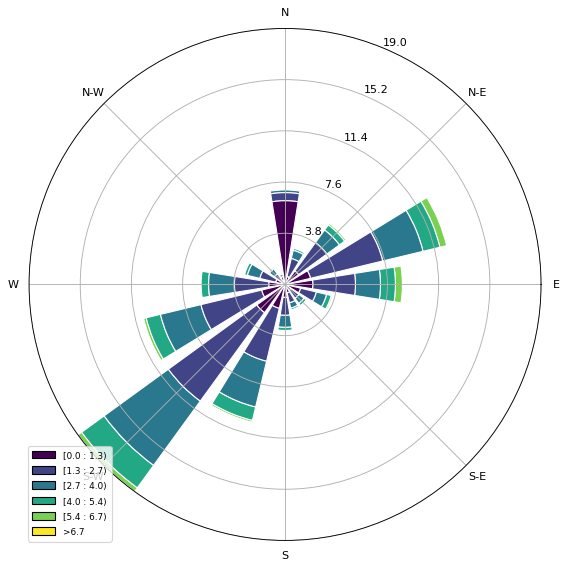

In [15]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

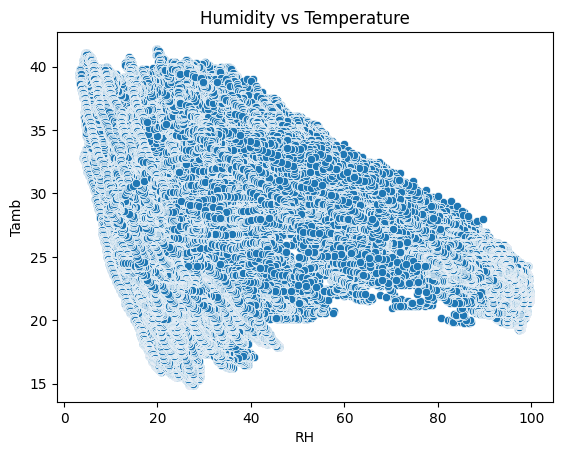

In [16]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('Humidity vs Temperature')
plt.show()


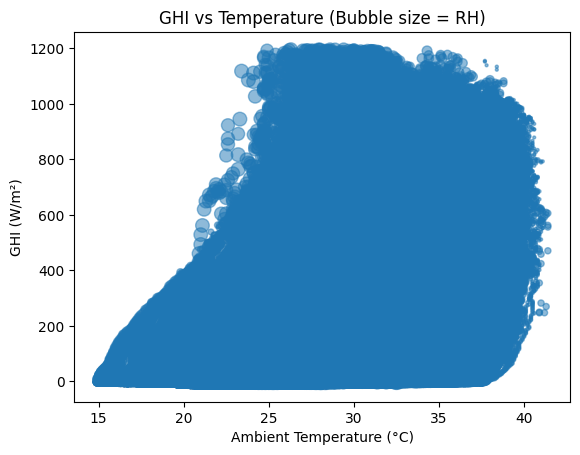

In [17]:
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size = RH)')
plt.show()
